In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
df = pd.read_csv("/Users/rahulmeena/Imarticus/GitHub/IMARTICUS/Datasets/class_exercise/Car_sales.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


Here, Our target variable is `Sales_in_thousands` for Linear regression model

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

### Categorical Data

In [58]:
cat_df = df.select_dtypes(include=['object'])
cat_df

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011
...,...,...,...,...
152,Volvo,V40,Passenger,9/21/2011
153,Volvo,S70,Passenger,11/24/2012
154,Volvo,V70,Passenger,6/25/2011
155,Volvo,C70,Passenger,4/26/2011


Remove Manufacture, Model columns as they are nominal data and also latest launch is irrelevant.

In [59]:
cat_df.drop(columns=["Manufacturer", "Model", "Latest_Launch"], inplace=True)

In [60]:
cat_df.head()

,Vehicle_type
0,Passenger
1,Passenger
2,Passenger
3,Passenger
4,Passenger


In [61]:
df['Vehicle_type'].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

Vehicle type has only two categories, so this is the only important categorical column.

### Numerical

In [62]:
num_df = df.select_dtypes(exclude=['object'])
num_df

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [63]:
num_df.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


#### Checking Correlation of input variables with target variable.

In [64]:
num_df[['Sales_in_thousands', 'four_year_resale_value']].corr()

,Sales_in_thousands,four_year_resale_value
Sales_in_thousands,1.000000,-0.279034
four_year_resale_value,-0.279034,1.000000


 `Correlation is weak` between 'Sales_in_thousands' and 'four_year_resale_value', also four_year_resale_value does not make buisness sense for our problem,  `so we can remove "four_year_resale_value" variable`. But we will check.

In [65]:
num_df[['Sales_in_thousands', 'Price_in_thousands']].corr()

,Sales_in_thousands,Price_in_thousands
Sales_in_thousands,1.000000,-0.304734
Price_in_thousands,-0.304734,1.000000


`Correlation is just ok` but we cant remove this variable as `it make buisness sense`.

In [66]:
num_df[['Sales_in_thousands', 'Engine_size']].corr()

,Sales_in_thousands,Engine_size
Sales_in_thousands,1.000000,0.019983
Engine_size,0.019983,1.000000


`Very weak correlation`. We can remove 'Engine_size'.

In [67]:
num_cols = ['four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

for col in num_cols:
    corr_value = num_df[['Sales_in_thousands', col]].corr()
    print(f"Correlation between 'Sales_in_thousands' and '{col}':\n{corr_value}\n")

Correlation between 'Sales_in_thousands' and 'four_year_resale_value':
                        Sales_in_thousands  four_year_resale_value
Sales_in_thousands                1.000000               -0.279034
four_year_resale_value           -0.279034                1.000000

Correlation between 'Sales_in_thousands' and 'Price_in_thousands':
                    Sales_in_thousands  Price_in_thousands
Sales_in_thousands            1.000000           -0.304734
Price_in_thousands           -0.304734            1.000000

Correlation between 'Sales_in_thousands' and 'Engine_size':
                    Sales_in_thousands  Engine_size
Sales_in_thousands            1.000000     0.019983
Engine_size                   0.019983     1.000000

Correlation between 'Sales_in_thousands' and 'Horsepower':
                    Sales_in_thousands  Horsepower
Sales_in_thousands            1.000000   -0.197756
Horsepower                   -0.197756    1.000000

Correlation between 'Sales_in_thousands' and 'Wheelb

`based on weak corelation can remove` we can remove certain columns.

In [68]:
num_df.drop(
    columns=['Engine_size' , 'Width', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency'], 
    inplace=True
)

In [69]:
num_df.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Length,Power_perf_factor
0,16.919,16.360,21.50,140.0,101.2,172.4,58.280150
1,39.384,19.875,28.40,225.0,108.1,192.9,91.370778
2,14.114,18.225,NaN,225.0,106.9,192.0,NaN
3,8.588,29.725,42.00,210.0,114.6,196.6,91.389779
4,20.397,22.255,23.99,150.0,102.6,178.0,62.777639


### Outliers

In [70]:
# Detection
# Percentile Method
num_df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,60.220000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Power_perf_factor,155.0,77.043591,25.142664,23.276272,38.46192,40.874394,43.026679,44.363465,46.203997,48.447741,60.407707,72.030917,89.414878,108.499252,125.091513,132.932239,135.134842,139.656887,141.119461,188.144323


In [53]:
# Outlier Treatment
def clip_outliers(x, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = x.quantile(lower_percentile)
    upper_bound = x.quantile(upper_percentile)
    return x.clip(lower=lower_bound, upper=upper_bound)

# Apply to the numerical DataFrame
num_df = num_df.apply(clip_outliers)

# # IQR outlier treatment
# def iqr_outliers(x):
#     Q1 = x.quantile(0.25)  # First quartile (25%)
#     Q3 = x.quantile(0.75)  # Third quartile (75%)
#     IQR = Q3 - Q1  # Interquartile range
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return x.clip(lower=lower_bound, upper=upper_bound)  # Clip outliers

# # Apply to the entire DataFrame
# num_df = num_df.apply(iqr_outliers)

In [54]:
num_df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,51.118020,57.722699,0.93728,0.946643,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,253.560581,260.645320
four_year_resale_value,121.0,18.020008,11.181335,6.17300,6.423400,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,59.896000,60.220000
Price_in_thousands,155.0,27.328745,14.063970,10.23144,10.476362,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,76.584508,78.479800
Horsepower,156.0,185.322436,52.816470,96.40000,98.380000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,317.087500,325.750000
Wheelbase,156.0,107.436538,7.424295,92.87500,92.998750,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,132.518750,134.375000
Length,156.0,187.332949,13.120350,154.91500,156.226750,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,217.102250,219.305000
Power_perf_factor,155.0,76.849583,23.844968,38.46192,39.285152,40.874394,43.026679,44.363465,46.203997,48.447741,60.407707,72.030917,89.414878,108.499252,125.091513,132.932239,135.134842,139.656887,141.109484,141.119461


### Missing Value

In [20]:
num_df=num_df.fillna(num_df.mean()) # filling missing value with mean 
num_df

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Length,Power_perf_factor
0,16.919,16.360000,21.500000,140.0,101.2,172.4,58.280150
1,39.384,19.875000,28.400000,225.0,108.1,192.9,91.370778
2,14.114,18.225000,27.328745,225.0,106.9,192.0,76.849583
3,8.588,29.725000,42.000000,210.0,114.6,196.6,91.389779
4,20.397,22.255000,23.990000,150.0,102.6,178.0,62.777639
...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,160.0,100.5,176.6,66.498812
153,15.245,18.020008,27.500000,168.0,104.9,185.9,70.654495
154,17.531,18.020008,28.800000,168.0,104.9,186.2,71.155978
155,3.493,18.020008,45.500000,236.0,104.9,185.7,101.623357


### Combining Categorical Dataframe and Numerical Dataframe

In [21]:
comb_df = pd.concat([cat_df, num_df], axis=1)
comb_df

,Vehicle_type,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Length,Power_perf_factor
0,Passenger,16.919,16.360000,21.500000,140.0,101.2,172.4,58.280150
1,Passenger,39.384,19.875000,28.400000,225.0,108.1,192.9,91.370778
2,Passenger,14.114,18.225000,27.328745,225.0,106.9,192.0,76.849583
3,Passenger,8.588,29.725000,42.000000,210.0,114.6,196.6,91.389779
4,Passenger,20.397,22.255000,23.990000,150.0,102.6,178.0,62.777639
...,...,...,...,...,...,...,...,...
152,Passenger,3.545,18.020008,24.400000,160.0,100.5,176.6,66.498812
153,Passenger,15.245,18.020008,27.500000,168.0,104.9,185.9,70.654495
154,Passenger,17.531,18.020008,28.800000,168.0,104.9,186.2,71.155978
155,Passenger,3.493,18.020008,45.500000,236.0,104.9,185.7,101.623357


### Dummy Creation

In [22]:
dummy_df=pd.get_dummies(
    data=comb_df, 
    columns=["Vehicle_type"], 
    drop_first=True, 
    dtype="int"
)
dummy_df

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Length,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360000,21.500000,140.0,101.2,172.4,58.280150,1
1,39.384,19.875000,28.400000,225.0,108.1,192.9,91.370778,1
2,14.114,18.225000,27.328745,225.0,106.9,192.0,76.849583,1
3,8.588,29.725000,42.000000,210.0,114.6,196.6,91.389779,1
4,20.397,22.255000,23.990000,150.0,102.6,178.0,62.777639,1
...,...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,160.0,100.5,176.6,66.498812,1
153,15.245,18.020008,27.500000,168.0,104.9,185.9,70.654495,1
154,17.531,18.020008,28.800000,168.0,104.9,186.2,71.155978,1
155,3.493,18.020008,45.500000,236.0,104.9,185.7,101.623357,1


In [23]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  157 non-null    float64
 2   Price_in_thousands      157 non-null    float64
 3   Horsepower              157 non-null    float64
 4   Wheelbase               157 non-null    float64
 5   Length                  157 non-null    float64
 6   Power_perf_factor       157 non-null    float64
 7   Vehicle_type_Passenger  157 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 9.9 KB


## Creating Linear Regression Model

#### Cheking Assumptions

In [24]:
dummy_df["Sales_in_thousands"] # y is continuous

0      16.919
1      39.384
2      14.114
3       8.588
4      20.397
        ...  
152     3.545
153    15.245
154    17.531
155     3.493
156    18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

<Axes: xlabel='Sales_in_thousands', ylabel='Count'>

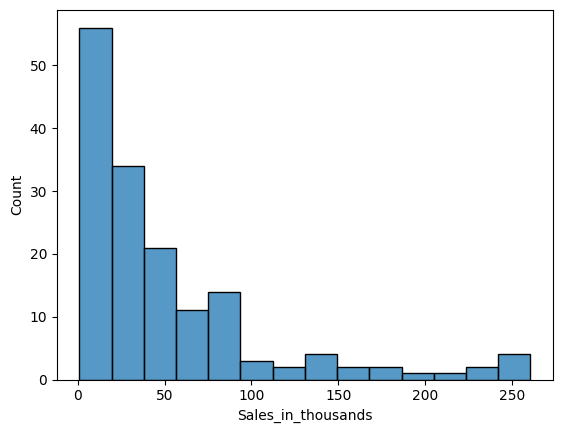

In [25]:
# y should be normally distributed 
sns.histplot(dummy_df['Sales_in_thousands'])

In [26]:
# To check normality of the data following test are done
# stats.shapiro  # When rows are less than 5000 
# stats.jarque_bera # when rows are more than or equal to 5000
# Null : data is  normal
# Alternative : data is not  normal

In [27]:
stats.shapiro(dummy_df["Sales_in_thousands"])

ShapiroResult(statistic=0.7548906481193881, pvalue=6.643700953235476e-15)

Interpretation:
p-value < 0.05: Since the p-value is far less than 0.05, you reject the null hypothesis.
This means that the `"Sales_in_thousands" data is not normally distributed`.


ShapiroResult(statistic=0.981267504729065, pvalue=0.03147547560830786)


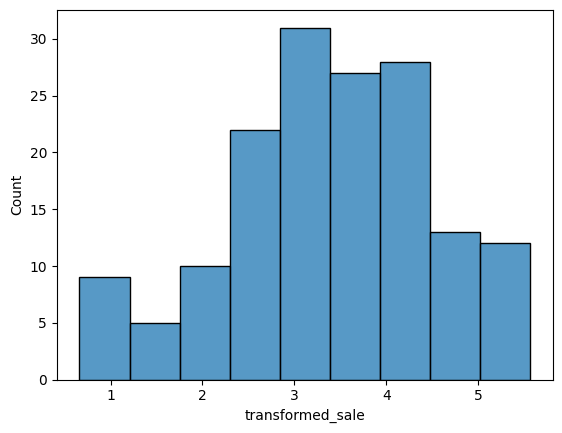

In [28]:
# Transforming data
dummy_df["transformed_sale"]=np.log1p(dummy_df["Sales_in_thousands"])

print(stats.shapiro(dummy_df["transformed_sale"]))
sns.histplot(dummy_df["transformed_sale"])
plt.show()

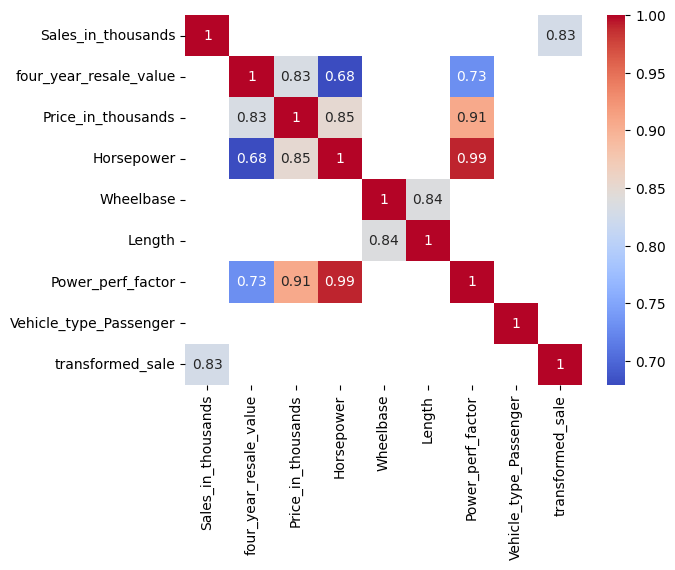

In [29]:
# Multicollinearity 
cr=dummy_df.corr()

cr=cr[abs(cr) > 0.6]

sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

### Model Creation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
dummy_df.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Length,Power_perf_factor,Vehicle_type_Passenger,transformed_sale
0,16.919,16.360,21.500000,140.0,101.2,172.4,58.280150,1,2.885862
1,39.384,19.875,28.400000,225.0,108.1,192.9,91.370778,1,3.698434
2,14.114,18.225,27.328745,225.0,106.9,192.0,76.849583,1,2.715621
3,8.588,29.725,42.000000,210.0,114.6,196.6,91.389779,1,2.260512
4,20.397,22.255,23.990000,150.0,102.6,178.0,62.777639,1,3.063251


In [40]:
y=dummy_df['transformed_sale']
x=dummy_df.drop(['Sales_in_thousands', 'transformed_sale'],axis=1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=88)

In [42]:
LR_model = LinearRegression()

In [43]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [44]:
LR_model.coef_

array([ 0.02624522, -0.22729787, -0.14523163,  0.02249275,  0.01853859,
        0.40720291, -0.36327654])

In [45]:
y_pred = LR_model.predict(x_test)

In [46]:
metrics.mean_squared_error(y_test, y_pred)

1.4562376755088442